In [1]:
from fastai.vision.all import *

In [7]:
path = Path.cwd()/"../datasets/Grape"
grapes_ = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(400),
    batch_tfms= aug_transforms(),
    splitter=RandomSplitter(valid_pct=0.3, seed=42)
)

grapes_full = grapes_.dataloaders(path)

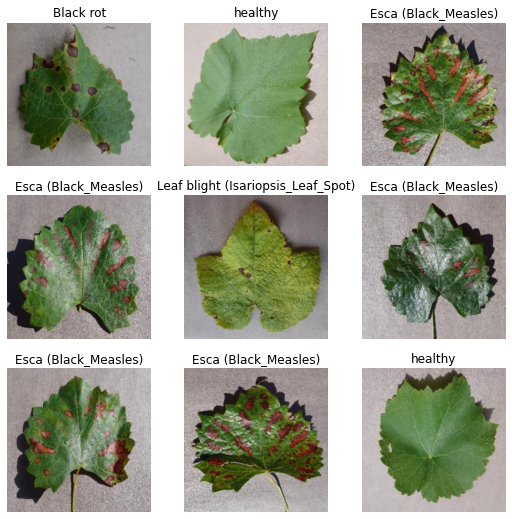

In [8]:
grapes_full.valid.show_batch()

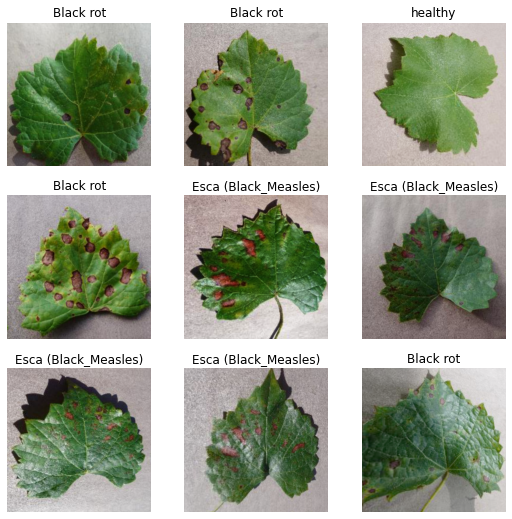

In [11]:
grapes_full.train.show_batch()

In [12]:
model = cnn_learner(grapes_full, resnet34, metrics=[accuracy, error_rate])

In [13]:
model.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.553500,0.073573,0.976190,0.023810,01:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.063901,0.019649,0.992611,0.007389,01:25
1,0.036314,0.024488,0.991790,0.008210,01:23
2,0.023003,0.010626,0.996716,0.003284,01:23
3,0.013417,0.013156,0.995074,0.004926,01:24
4,0.015367,0.015293,0.992611,0.007389,01:24
5,0.015292,0.073471,0.985222,0.014778,01:24
6,0.015481,0.053171,0.986043,0.013957,01:24
7,0.012806,0.005287,0.998358,0.001642,01:24
8,0.014468,0.009263,0.998358,0.001642,01:23
9,0.010273,0.002139,0.999179,0.000821,01:24


In [14]:
interp = ClassificationInterpretation.from_learner(model)

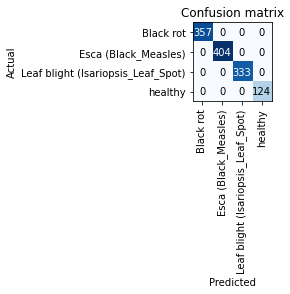

In [17]:
interp.plot_confusion_matrix()

In [18]:
path1 = Path.cwd()/"../models/grapes.pkl"
model.export(path1)

In [23]:
from fastai.vision.widgets import FileUpload

In [24]:
btn = FileUpload()
btn

FileUpload(value={}, description='Upload')

In [31]:
model.predict(btn.data[0])

('healthy',
 tensor(3),
 tensor([1.5659e-01, 4.7128e-06, 6.5042e-04, 8.4275e-01]))